# 슈떼 분석 - 복습

In [2]:
# 기본적으로 필요한 라이브러리 로딩

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit


# 자주 사용할만한 사용자 정의 함수 정의

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def rjitt5(arr):
    stdev = .07*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)


import warnings
# 경고 메시지 숨기기
warnings.filterwarnings('ignore')



# 데이터를 불러올 기본 위치 지정

# local data path
# dataPath = 'D:/YONG/myPydata/' # 생성위치는 사용자 지정
dataPath = 'C:/Users/kofot/fashionRetailAnalysisPy_4a-20230629T052521Z-001/fashionRetailAnalysisPy_4a/' # 생성위치는 사용자 지정


import matplotlib.font_manager

    
# matplotlib 에서 한글을 표시하기 위한 설정
font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록


In [3]:
# 판매내역 테이블 불러오기
sales = pd.read_csv(dataPath + 'brk_salesmast01.csv', encoding='euc-kr')
sales = sales.drop(sales.columns[0], axis=1)

# 상품 테이블 불러오기
itemmast = pd.read_csv(dataPath + 'brk_itemmast01.csv', encoding='euc-kr')
itemmast = itemmast.drop(itemmast.columns[0], axis=1)

# 고객 테이블 불러오기
custmast = pd.read_csv(dataPath + 'brk_custmast01.csv', encoding='euc-kr')
custmast = custmast.drop(custmast.columns[0], axis=1)



In [30]:
# 슈떼 고객층과 인기상품 분석

# sales 데이터프레임에서 브랜드명이 'S'로 시작하는 행을 선택하고, 
# 필요한 열을 선택하여 새로운 데이터프레임을 생성합니다.
dfSa1 = sales[sales.brand_nm.str.slice(0, 1) == 'S'][['brand_nm', 'lcat', 'scat', 'cust_id']].merge(custmast, how='left', on='cust_id')

# 데이터프레임 dfSa1에서 필요한 열만 선택하여, 고객의 연령(age)과 성별(sex)에 대한 평균과 개수(count)를 계산합니다.
dfSa2 = dfSa1[['lcat', 'scat', 'age', 'sex']].groupby(['lcat', 'scat', 'sex']).aggregate(['mean', 'count']).reset_index()

dfSa2.head()

lcat scat sex        age      
                        mean count
0  남성캐주얼   바지   F  35.336752  1170
1  남성캐주얼   바지   M  35.251349  1297
2  남성캐주얼   셔츠   F  35.316657  1699
3  남성캐주얼   셔츠   M  35.471933  1924
4  남성캐주얼   재킷   F  35.311453   716

In [31]:
# 데이터프레임의 열 이름을 재설정합니다.
dfSa2.columns = ['lcat', 'scat', 'sex', 'mean_age', 'cnt']

# 고객 수(count)를 기준으로 내림차순으로 정렬하고, 가장 많은 고객 수를 가진 10개 항목을 선택합니다.
dfSa2_sorted = dfSa2.sort_values('cnt', ascending=False).head(10)

dfSa2_sorted

lcat scat sex   mean_age   cnt
6   여성캐주얼   바지   F  35.354268  7579
8   여성캐주얼   셔츠   F  35.569872  3764
12  여성캐주얼   치마   F  35.761053  2013
3   남성캐주얼   셔츠   M  35.471933  1924
2   남성캐주얼   셔츠   F  35.316657  1699
1   남성캐주얼   바지   M  35.251349  1297
0   남성캐주얼   바지   F  35.336752  1170
14     코트   코트   F  35.189937   795
5   남성캐주얼   재킷   M  35.591969   772
4   남성캐주얼   재킷   F  35.311453   716

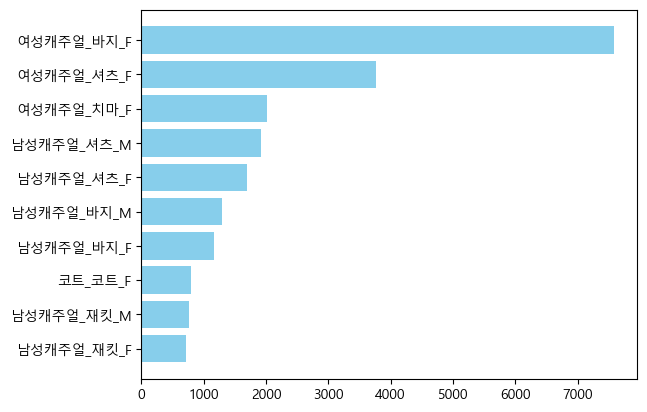

In [32]:
# 가장 많은 고객 수를 가진 10개 항목에 대한 가로 막대 그래프를 그립니다.

# 테이블 보던것과 순서를 반대로 하기 위해서
# 뒤집어줌
dfSa2_sorted1 = dfSa2_sorted.sort_values('cnt')

# 뒤집은 것으로 막대챠트 생성
plt.barh(dfSa2_sorted1.lcat + "_" + dfSa2_sorted1.scat + "_" + dfSa2_sorted1.sex, dfSa2_sorted1.cnt, color='skyblue')
plt.show()

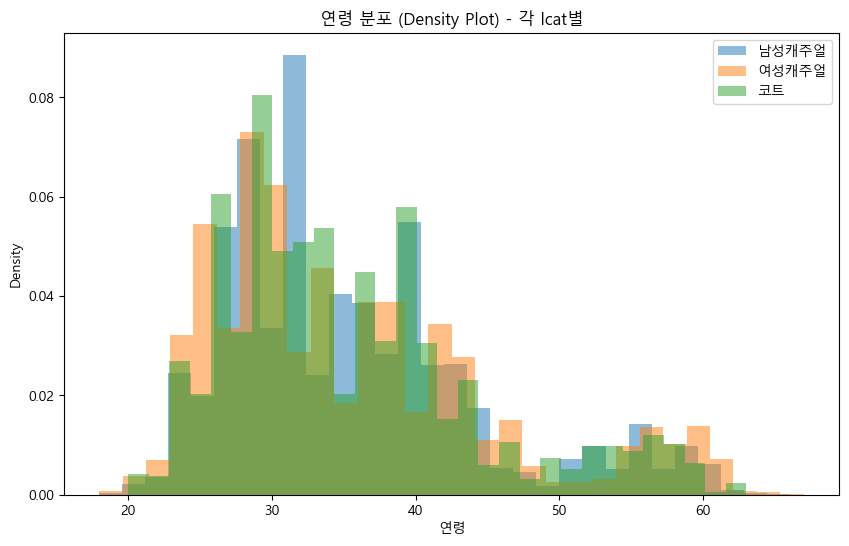

In [34]:
data = dfSa1.copy()

# 'lcat' 카테고리별로 연령 분포를 비교하는 density plot을 그립니다.
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 'lcat' 카테고리 목록을 가져옵니다.
lcat_categories = data['lcat'].unique()

# 각 카테고리별로 density plot을 그립니다.
for category in lcat_categories:
    subset = data[data['lcat'] == category]
    plt.title('연령 분포 (Density Plot) - 각 lcat별')
    plt.xlabel('연령')
    plt.ylabel('Density')
    
    # KDE를 그리기 위해 'plot' 함수를 사용합니다.
    plt.hist(subset['age'], bins=30, density=True, alpha=0.5, label=category)

# 범례를 추가하여 각 카테고리를 식별합니다.
plt.legend(loc='upper right')

# 그래프를 표시합니다.
plt.show()
